In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt

In [2]:
PATH = "/content/drive/MyDrive/Colab Notebooks/AnaliseFaces/"

In [3]:
imagem = cv2.imread(PATH+"imagens/px-girl.jpg")

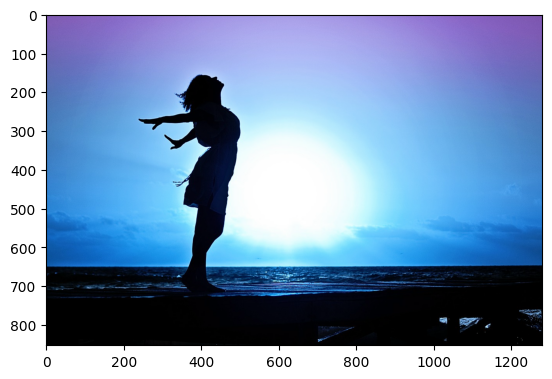

In [4]:
plt.imshow(imagem)

In [5]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

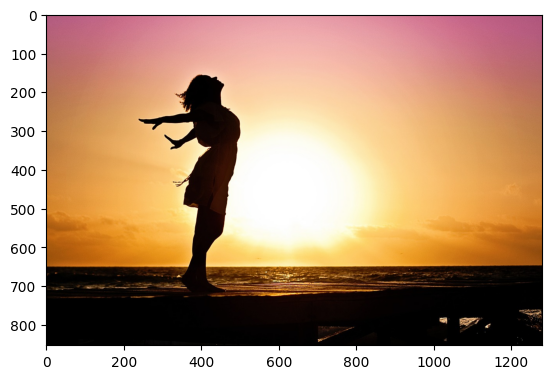

In [6]:
plt.imshow(imagem_rgb)

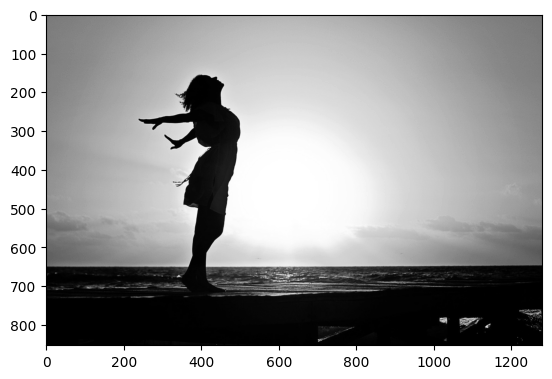

In [7]:
imagem_gray = cv2.cvtColor(imagem_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(imagem_gray, cmap="gray")

Black and white images are way lighter, since they only have a single channel. Thus, 1/3 of RBG and other formats

In [8]:
imagem_gray.shape

(853, 1280)

# Slicing Images

In [9]:
imagem = cv2.imread(PATH + "imagens/px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

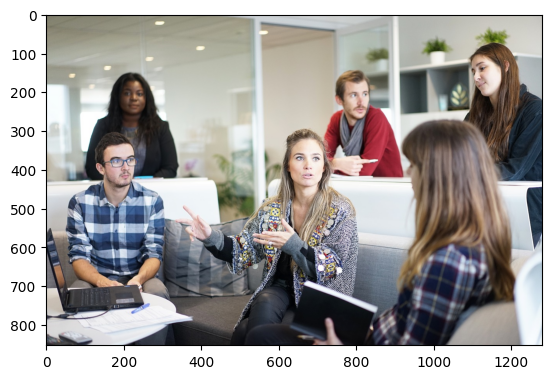

In [10]:
plt.imshow(imagem)

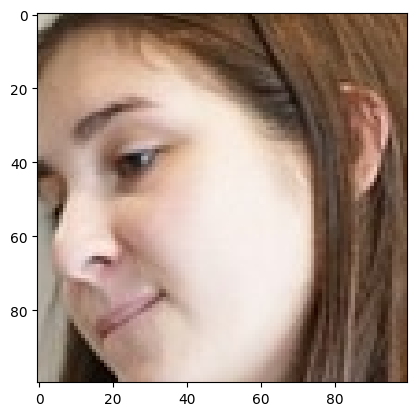

In [11]:
imagem_roi = imagem[100:200, 1100:1200]
plt.imshow(imagem_roi)

In [12]:
imagem_roi_bgr = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)

In [13]:
cv2.imwrite(PATH+"imagem_roi.png", imagem_roi_bgr)

True

# Harr Classifier

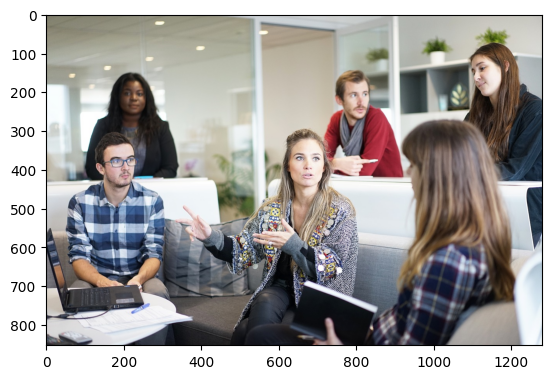

In [14]:
imagem = cv2.imread(PATH + "imagens/px-people.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [15]:
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_RGB2GRAY)

Trained models can be downloaded from opencv's website

In [16]:
classificador = cv2.CascadeClassifier(PATH + "classificadores/haarcascade_frontalface_default.xml")

In [17]:
faces = classificador.detectMultiScale(imagem_gray, 1.3, 5)

In [18]:
imagem_anotada = imagem.copy()

In [19]:
for (x, y, w, h) in faces:
  cv2.rectangle(imagem_anotada, (x,y), (x+w, y+h), (255, 255, 0), 2)

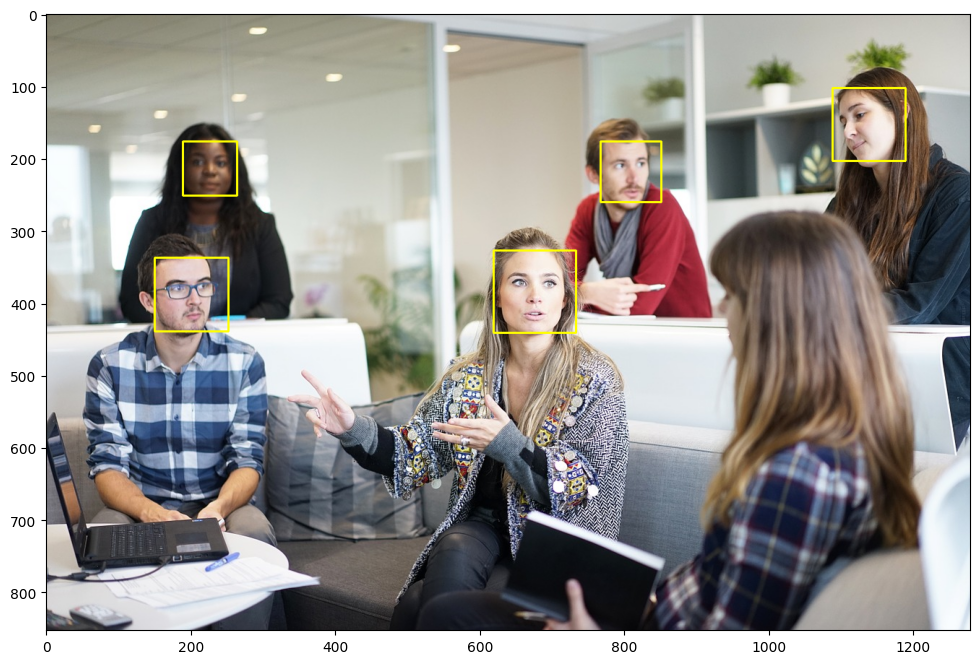

In [20]:
plt.figure(figsize=(12, 8))
plt.imshow(imagem_anotada)

In [21]:
face_imagem = 0

for (x,y,w,h) in faces:
  face_imagem += 1
  imagem_roi = imagem[y:y+h, x:x+w]
  imagem_roi = cv2.cvtColor(imagem_roi, cv2.COLOR_RGB2BGR)
  cv2.imwrite(PATH+f"face{face_imagem}.png", imagem_roi)

# Preprocessing

In [26]:
imagens = []

for i in range(1, 4):
  imagem_face = cv2.imread(PATH + f"imagens/cropped_faces/s0{i}_01.jpg")
  imagem_face = cv2.cvtColor(imagem_face, cv2.COLOR_BGR2RGB)
  imagens.append(imagem_face)


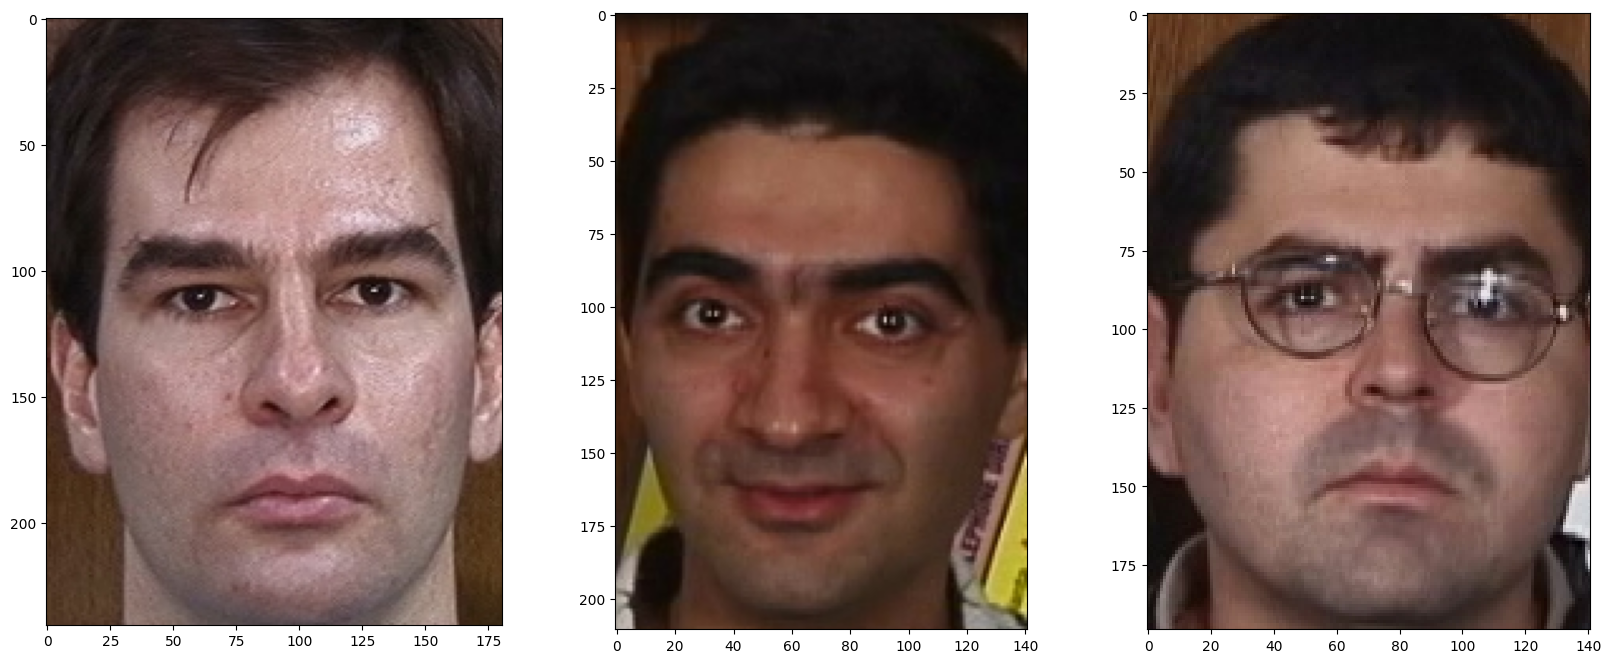

In [39]:
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

for c, image in enumerate(imagens):
  ax = axs[c]
  ax.imshow(image)

plt.show()

Perceba que cada imagem tem um tamanho diferente. É necessário normalizá-las

In [41]:
for c, imagem in enumerate(imagens):
  print(f"Individuo {c+1}: ", imagem.shape)

Individuo 1:  (241, 181, 3)
Individuo 2:  (211, 141, 3)
Individuo 3:  (196, 141, 3)


In [48]:
import os
import shutil

Slitting data into train and test

In [44]:
faces_caminho = PATH + "imagens/cropped_faces/"
lista_arq_faces = [f for f in os.listdir(faces_caminho) if os.path.isfile(os.path.join(faces_caminho, f))]

In [49]:
faces_path_treino = PATH + "imagens/treino/"
faces_path_teste = PATH + "imagens/teste/"

paths = [faces_path_treino, faces_path_teste]

for path in paths:
  if not os.path.exists(path):
    os.makedirs(path)

for arq in lista_arq_faces:
  sujeito = arq[1:3]
  numero = arq[4:6]

  if int(numero) <= 10:
    shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
  else:
    shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)

## Standardizing Images

In [70]:
def padrozinar_imagem(imagem_caminho):
  imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
  imagem = cv2.resize(imagem, (200, 200), interpolation=cv2.INTER_LANCZOS4)
  return imagem

In [71]:
lista_faces_treino = [f for f in os.listdir(faces_path_treino) if os.path.isfile(os.path.join(faces_path_treino, f))]
lista_faces_teste   = [f for f in os.listdir(faces_path_teste) if os.path.isfile(os.path.join(faces_path_teste, f))]

In [72]:
dados_treinamento, sujeitos = [], []
for c, arq in enumerate(lista_faces_treino):
  imagem_path = faces_path_treino + arq
  imagem = padrozinar_imagem(imagem_path)
  dados_treinamento.append(imagem)
  sujeito = arq[1:3]
  sujeitos.append(int(sujeito))


dados_teste, sujeitos_teste = [], []
for c, arq in enumerate(lista_faces_teste):
  imagem_path = faces_path_teste + arq
  imagem = padrozinar_imagem(imagem_path)
  dados_teste.append(imagem)
  sujeito = arq[1:3]
  sujeitos_teste.append(int(sujeito))

In [73]:
import numpy as np

In [74]:
sujeitos = np.array(sujeitos, dtype=np.int32)
sujeitos_teste = np.array(sujeitos_teste, dtype = np.int32)

# Modelos

## EigenFaces

In [75]:
modelo_eigenfaces = cv2.face.EigenFaceRecognizer_create()
modelo_eigenfaces.train(dados_treinamento, sujeitos)

<Figure size 2000x1000 with 0 Axes>

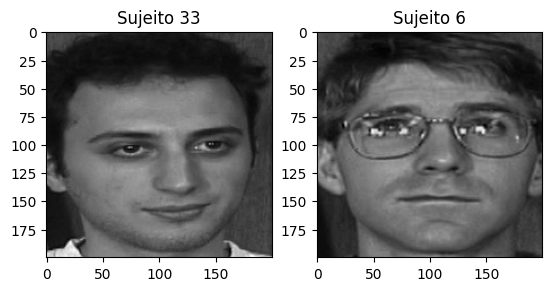

In [78]:
plt.figure(figsize=(20, 10))
fig, axs = plt.subplots(1, 2)


for i in range(6, 8):
  ax = axs[i-6]
  ax.set_title(f"Sujeito {sujeitos_teste[i]}")
  ax.imshow(dados_teste[i], cmap="gray")

plt.show()

In [82]:
def predict_model(model, data):
  predicts = []
  for dat in data:
    predict = model.predict(dat)
    predicts.append(predict)
  return predicts

In [87]:
predict_model(modelo_eigenfaces, [dados_teste[6], dados_teste[7]])

[(33, 3428.2004871960326), (6, 5027.229855083137)]

## Fisherfaces

In [88]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(dados_treinamento, sujeitos)
predict_model(modelo_fisherfaces, [dados_teste[6], dados_teste[7]])

[(33, 723.2826545401423), (32, 895.1189028543913)]

## LBPH

Should be the more powerfull. We can notice that the distances are way smaller than the two previous models

In [89]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treinamento, sujeitos)
predict_model(modelo_lbph, [dados_teste[6], dados_teste[7]])

[(33, 34.15795723901335), (6, 36.49919959564635)]

## Evaluating Models

In [97]:
from sklearn.metrics import accuracy_score
y_predicoes_eigenfaces = []
y_predicoes_fisherfaces = []
y_predicoes_lbph = []

ys = [y_predicoes_eigenfaces, y_predicoes_fisherfaces,  y_predicoes_lbph]
modelos = [modelo_eigenfaces, modelo_fisherfaces, modelo_lbph]
accuracies = []

for c, y in enumerate(ys):
  for item in dados_teste:
    y.append(modelos[c].predict(item)[0])
  acc = accuracy_score(sujeitos_teste, y)
  accuracies.append(acc)

In [99]:
accuracies

[0.724, 0.52, 0.792]

# Catching Webcam Image

In [100]:
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

def padronizar_imagem(imagem):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, (400,300))
    return imagem

def exibir_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [103]:
captura_video = cv2.VideoCapture(0)

try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = padronizar_imagem(frame)
            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("Interrompido")

Interrompido


In [ ]:
from io import BytesIO
from IPython.display import clear_output, Image, display
from PIL import Image as Img

def padronizar_imagem(imagem):
    imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    imagem = cv2.resize(imagem, (400,300))
    return imagem

def exibir_video(frame):
    img = Img.fromarray(frame, "RGB")
    buffer = BytesIO()
    img.save(buffer, format="JPEG")
    display(Image(data=buffer.getvalue()))
    clear_output(wait=True)

In [ ]:
captura_video = cv2.VideoCapture(0)

classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

contador = 0


try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = padronizar_imagem(frame)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

            faces = classificador_face.detectMultiScale(frame_gray, 1.3, 5)

            if len(faces) > 0:
                contador += 1
                if contador <= 100:
                    for (x,y,w,h) in faces:
                        roi = frame_gray[y:y+h, x:x+w]
                        cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LANCZOS4)

                        cv2.imwrite("imagens/guilherme/" + str(contador) + ".png", roi)

                        cv2.putText(frame, "Coletado " + str(contador) + " faces", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)
                else:
                    cv2.putText(frame, "ConcluIdo", (20,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,0), 2)

            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("Interrompido")

In [ ]:
from os import listdir
from os.path import isfile, join
import numpy as np
faces_caminho_treinamento = "imagens/guilherme/"
lista_faces_treinamento = [f for f in listdir(faces_caminho_treinamento) if isfile(join(faces_caminho_treinamento, f))]

dados_treinamento, sujeitos = [], []

for i, arquivo in enumerate(lista_faces_treinamento):
    imagem_caminho = faces_caminho_treinamento + arquivo
    imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    dados_treinamento.append(imagem)
    sujeitos.append(0)

sujeitos = np.asarray(sujeitos, dtype=np.int32)
model_lbph = cv2.face.LBPHFaceRecognizer_create()
model_lbph.train(dados_treinamento, sujeitos)


In [ ]:
captura_video = cv2.VideoCapture(0)

classificador_face = cv2.CascadeClassifier('classificadores/haarcascade_frontalface_default.xml')

contador = 0

try:
    while(True):
        captura_ok, frame = captura_video.read()

        if captura_ok:
            frame = padronizar_imagem(frame)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
            faces = classificador_face.detectMultiScale(frame_gray, 1.3, 5)

            if len(faces) > 0:
                for (x,y,w,h) in faces:
                    roi = frame_gray[y:y+h, x:x+w]
                    roi = cv2.resize(roi, (200, 200), interpolation=cv2.INTER_LANCZOS4)
                    predicao = model_lbph.predict(roi)
                    cv2.putText(frame, "Similaridade " + str(predicao[1]), (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,150), 2)

            exibir_video(frame)

except KeyboardInterrupt:
    captura_video.release()
    print("Interrompido")

# DLIB

This library detects specific parts of the face, to analise behaviors.

In [105]:
import dlib

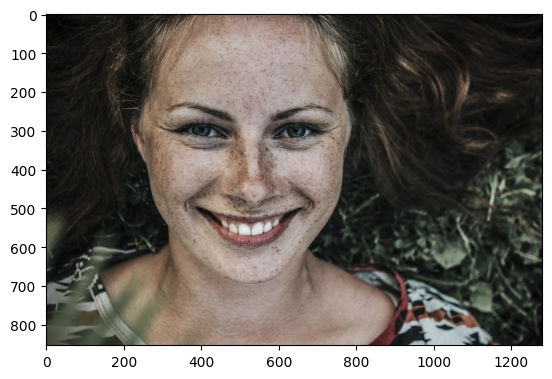

In [106]:
imagem = cv2.imread(PATH+"imagens/px-woman-smilings.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [107]:
classificador_dlib_68 = PATH + "classificadores/shape_predictor_68_face_landmarks.dat"
classificador_dlib = dlib.shape_predictor(classificador_dlib_68)
detector_face = dlib.get_frontal_face_detector()

In [108]:
def anotar_rosto(imagem):
  retangulos = detector_face(imagem, 1)

  if retangulos == 0:
    return None

  for k, d in enumerate(retangulos):
    print(f"identificado rosto {k}")
    cv2.rectangle(imagem, (d.left(), d.top()), (d.right(), d.bottom()), (255, 255, 0), 2)

  return imagem

identificado rosto 0


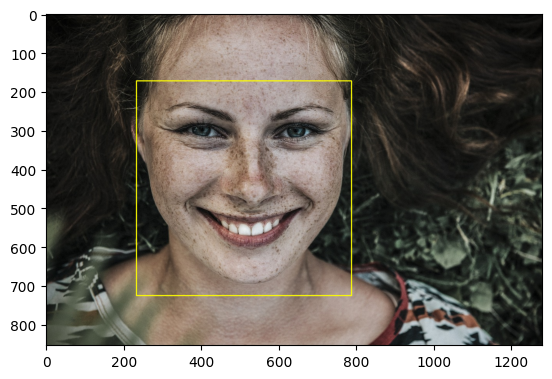

In [109]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_rosto(imagem_anotada)
plt.imshow(imagem_anotada)

In [110]:
def pontos_marcos_faciais(imagem):
  retangulos = detector_face(imagem, 1)

  if len(retangulos) == 0:
    return None

  marcos = []

  for ret in retangulos:
    marcos.append(np.matrix([[p.x, p.y] for p in classificador_dlib(imagem, ret).parts()]))

  return marcos

In [112]:
marcos_faciais = pontos_marcos_faciais(imagem)

In [115]:
def anotar_marcos_faciais(imagem, marcos):
  for marco in marcos:
      for idx, ponto in enumerate(marco):
        centro = (ponto[0,0], ponto[0,1])
        cv2.circle(imagem, centro, 3, (255, 255, 0), -1)
        cv2.putText(imagem, str(idx), centro, cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

  return imagem

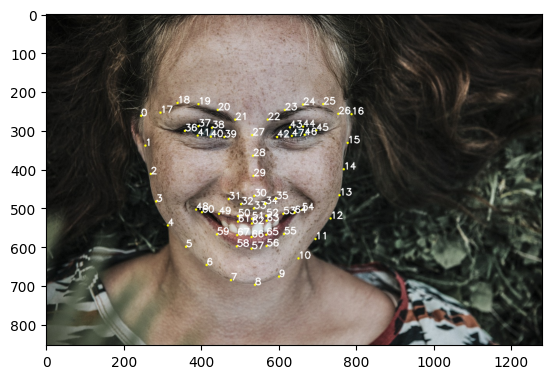

In [116]:
imagem_anotada = imagem.copy()
imagem_anotada = anotar_marcos_faciais(imagem_anotada, marcos_faciais)
plt.imshow(imagem_anotada)

In [117]:
from scipy.spatial import distance as dist

In [118]:
def aspecto_razao_olhos(pontos_olhos):
  a = dist.euclidean(pontos_olhos[1], pontos_olhos[5])
  b = dist.euclidean(pontos_olhos[2], pontos_olhos[4])
  c = dist.euclidean(pontos_olhos[3], pontos_olhos[0])

  aspecto_razao = (a+b)/(2.0*c)

  return aspecto_razao

In [ ]:
def anotar_marcos_casca_convexa(imagem, marcos):
  retangulos = detector_face(imagem, 1)

  if len(retangulos) == 0:
    return None

  for idx, ret in enumerate(retangulos):
    marco = marcos[idx]
    pontos = cv2.convexHull(marco[OLHO_ESQUERDO])
    cv2.drawContours(imagem, [pontos], 0, (0, 255, 0), 2)

    pontos = cv2.convexHull(marco[OLHO_DIREITO])
    cv2.drawContours(imagem, [pontos], 0, (0, 255, 0), 2)

  return imagem

In [ ]:
imagem_anotada = imagem_anotada.copy()
imagem_anotada = anotar_marcos_faciais_casca_convexa(imagem_anotada, marcos_faciais)

In [ ]:
plt.imshow(imagem_anotada)

In [ ]:
valor_olhos_esquerdo = aspecto_razao_olhos(marcos_faciais[0][OLHO_ESQUERDO])
valor_olhos_direito = aspecto_razao_olhos(marcos_faciais[0][OLHO_DIREITO])

print(valor_olhos_esquerdo)
print(valor_olhos_direito)